In [3]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

python 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
numpy 1.26.4
pandas 2.2.2
matplotlib 3.8.4


## legend의 위치 선정

### 예제1

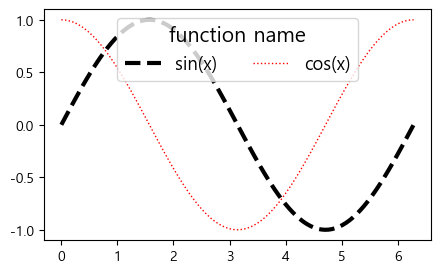

In [7]:
fig=plt.figure(figsize=(5,3), dpi=100)
ax1=fig.subplots()

X=np.linspace(0,2*np.pi, 100)
Y1=np.sin(X)
Y2=np.cos(X)

_=ax1.plot(X,Y1, c='k', lw=3, ls='--',label='sin(x)')
_=ax1.plot(X,Y2, c='r', lw=1, ls=':',label='cos(x)')
_=ax1.legend(title='function name', loc='upper center', ncol=2, fontsize=13, title_fontsize=15)

### legend 함수 파라미터: bbox_to_anchor

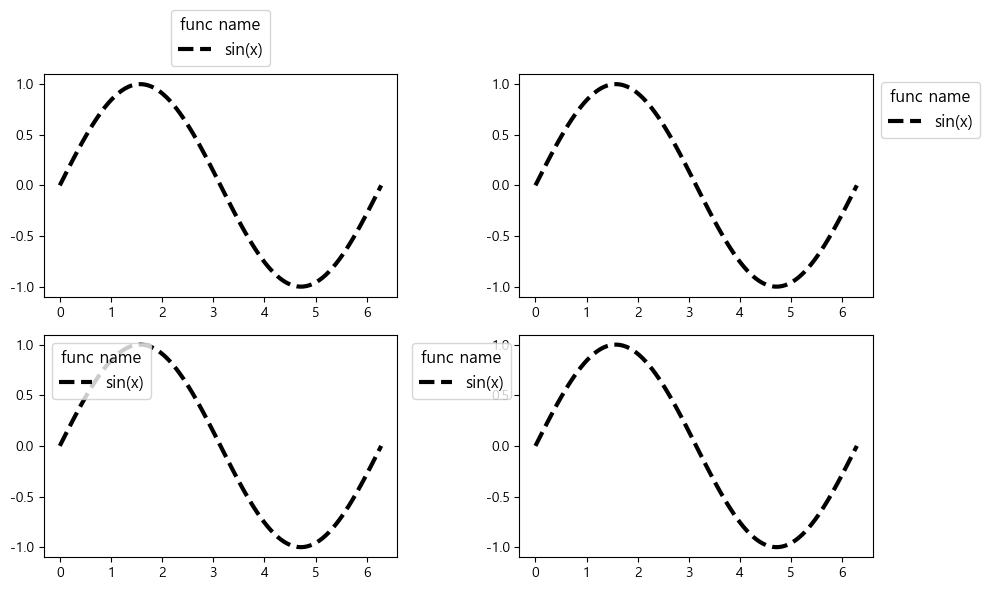

In [8]:
fig=plt.figure(figsize=(10,6), dpi=100)
axs=fig.subplots(2,2).flatten()

X=np.linspace(0,2*np.pi, 100)
Y1=np.sin(X)

_=axs[0].plot(X,Y1, c='k', lw=3, ls='--',label='sin(x)')
_=axs[0].legend(title='func name', loc='lower center', ncol=2, fontsize=12, title_fontsize=12, bbox_to_anchor=(0.5,1.0))

_=axs[1].plot(X,Y1, c='k', lw=3, ls='--',label='sin(x)')
_=axs[1].legend(title='func name', loc='upper left', ncol=2, fontsize=12, title_fontsize=12, bbox_to_anchor=(1.0,1.0))

_=axs[2].plot(X,Y1, c='k', lw=3, ls='--',label='sin(x)')
_=axs[2].legend(title='func name', loc='upper left', ncol=2, fontsize=12, title_fontsize=12)

_=axs[3].plot(X,Y1, c='k', lw=3, ls='--',label='sin(x)')
_=axs[3].legend(title='func name', loc='upper right', ncol=2, fontsize=12, title_fontsize=12, bbox_to_anchor=(0,1.0))

fig.tight_layout()

### 실습1

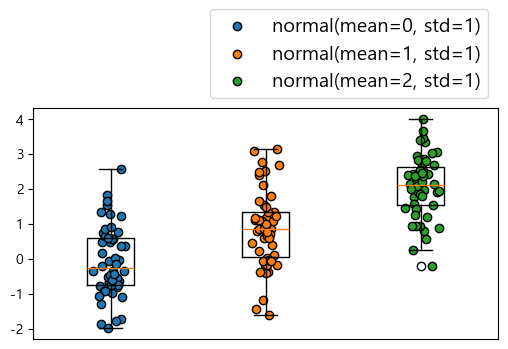

In [25]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax=fig.subplots()

d1=np.random.normal(0,1,50)
d2=np.random.normal(1,1,50)
d3=np.random.normal(2,1,50)

## 코드작성 (boxplot + scatter)
_=ax.boxplot([d1,d2,d3])
_=ax.set_xticks([])
_=ax.scatter(np.random.normal(1,0.05,len(d1)), d1, edgecolor='k', label='normal(mean=0, std=1)')
_=ax.scatter(np.random.normal(2,0.05,len(d2)), d2, edgecolor='k', label='normal(mean=1, std=1)')
_=ax.scatter(np.random.normal(3,0.05,len(d3)), d3, edgecolor='k', label='normal(mean=2, std=1)')
_=ax.legend(loc='lower right', bbox_to_anchor=(1,1), fontsize=14)

### 실습2

0    11
1     8
2    11
3    20
4    10
5    16
6     8
7    10
dtype: int32

(0    11
 2    11
 3    20
 5    16
 dtype: int32,
 1     8
 4    10
 6     8
 7    10
 dtype: int32)

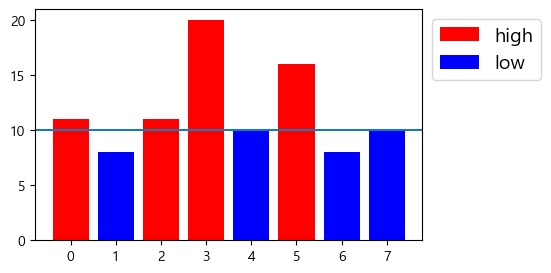

In [51]:
# 랜덤하게 생성되는 8개의 정수로 series d1을 만들었다.
# 값이 10이하이면 파란색 bar를, 10초과이면 빨간색 bar를 시각화하고
# 각각 low, high로 legend를 추가하시오

fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

d1=pd.Series(np.random.randint(1,21,8))
d1

#=== 코드작성 ===#
d2 = d1.loc[d1>10]
d3 = d1.loc[d1<=10]
d2, d3
_=ax.bar(d2.index,d2,color='r', label='high')
_=ax.bar(d3.index,d3,color='b', label='low')

# 바플롯 한번에 라벪나누기 안됨
# colors = np.where(d1>10,'r','b')
# lables = np.where(d1>10,'high','low')
# _=ax.bar(d1.index,d1,color=colors, label=lables)

_=ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=14)
_=ax.axhline(y=10)

## 부그림 넣기

### inset_axes

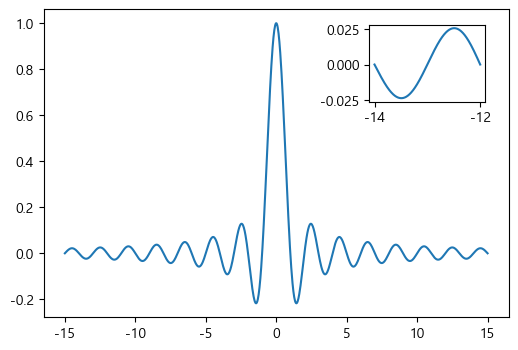

In [43]:
fig=plt.figure(figsize=(6,4), dpi=100)

ax1=fig.subplots()
X=np.linspace(-15,15, 1000)
Y=np.sinc(X)
ax1.plot(X,Y)

ins_ax=ax1.inset_axes([0.7,0.7, 0.25,0.25])
Xins=np.linspace(-14,-12,500)
Yins=np.sinc(Xins)
ins_ax.plot(Xins, Yins)

### 실습3

(1.5, 2.5)

(1.5, 2.5)

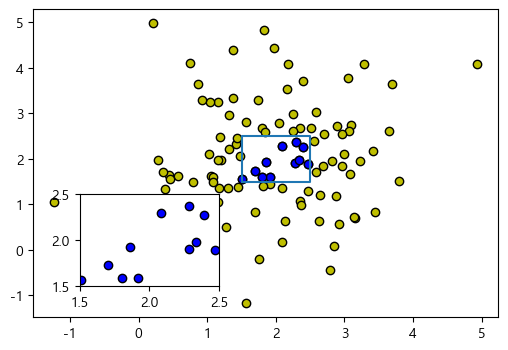

In [113]:
fig=plt.figure(figsize=(6,4), dpi=100)

## ax1 sinc plotting
ax1=fig.subplots()
d=np.random.normal(2,1,size=(100,2))
x=d[:,0]
y=d[:,1]
ax1.scatter(x,y, edgecolor='k', color='y')

## 코드작성
_=ax1.plot([1.5,2.5,2.5,1.5,1.5],[1.5,1.5,2.5,2.5,1.5])

inset_ax=ax1.inset_axes([0.1,0.1,0.3,0.3])
ds=d[(1.5<x)&(x<2.5)&(1.5<y)&(y<2.5)]
xs=ds[:,0]
ys=ds[:,1]
ax1.scatter(xs, ys, edgecolor='k', color='b')
inset_ax.scatter(xs, ys, edgecolor='k', color='b')
inset_ax.set_xlim([1.5,2.5])
inset_ax.set_ylim([1.5,2.5])

### 실습4

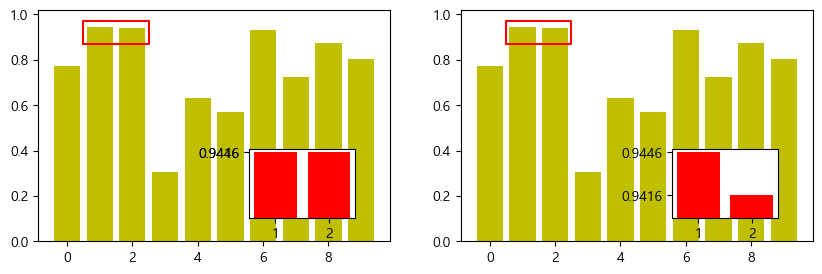

In [117]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1, ax2=fig.subplots(1,2)

y=np.array([0.7715, 0.9446, 0.9416, 0.3041, 0.6338, 0.5686, 0.9298, 0.7257, 0.8739, 0.8057])
x=range(10)

plot_X=[0.5,0.5,2.5,2.5,0.5]
plot_Y=[0.87,0.97,0.97,0.87,0.87]

# ax1
_=ax1.bar(x,y,color='y')
_=ax1.plot(plot_X,plot_Y,'r')

y1=y[1:3]
ins_ax1=ax1.inset_axes([0.6,0.1, 0.3,0.3])
_=ins_ax1.bar([1,2], y1,color='r')

_=ins_ax1.set_yticks(y1)

# ax2
_=ax2.bar(x,y,color='y')
_=ax2.plot(plot_X,plot_Y,'r')

ins_ax2=ax2.inset_axes([0.6,0.1, 0.3,0.3])
_=ins_ax2.bar([1,2], y1-0.94,color='r')

_=ins_ax2.set_yticks(y1-0.94, labels=y1)

## 코드작성


## ==== 실습풀이 ====

### 실습1

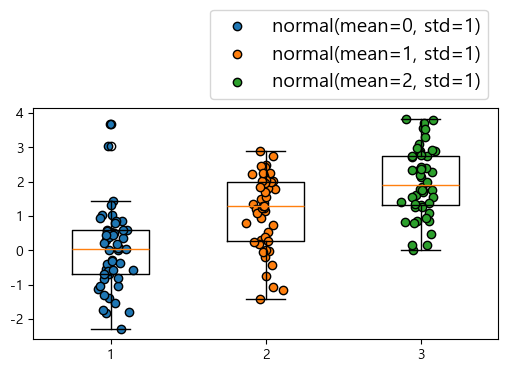

In [10]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax=fig.subplots()

d1=np.random.normal(0,1,50)
d2=np.random.normal(1,1,50)
d3=np.random.normal(2,1,50)

## 코드작성
_=ax.boxplot([d1,d2,d3], positions=[1,2,3], widths=0.5)
_=ax.scatter(np.random.normal(1,0.05,len(d1)), d1, edgecolor='k', label='normal(mean=0, std=1)')
_=ax.scatter(np.random.normal(2,0.05,len(d2)), d2, edgecolor='k', label='normal(mean=1, std=1)')
_=ax.scatter(np.random.normal(3,0.05,len(d3)), d3, edgecolor='k', label='normal(mean=2, std=1)')
_=ax.legend(loc='lower right',bbox_to_anchor=(1,1), fontsize=14)
## 코드작성 끝

### 실습2

0    16
1    20
2    12
3    10
4     6
5     1
6     3
7    11
dtype: int32

3    10
4     6
5     1
6     3
dtype: int32

0    16
1    20
2    12
7    11
dtype: int32

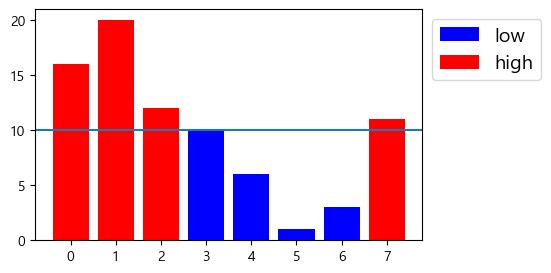

In [5]:
# 랜덤하게 생성되는 8개의 정수로 series d1을 만들었다.
# 값이 10이하이면 파란색 bar를, 10초과이면 빨간색 bar를 시각화하고
# 각각 low, high로 legend를 추가하시오

fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

d1=pd.Series(np.random.randint(1,21,8))
d1

#=== 코드작성 ===#
d2=d1.loc[d1<=10]
d3=d1.loc[d1>10]

d2
d3
_=ax.bar(d2.index, d2, color='b',label='low')
_=ax.bar(d3.index, d3, color='r',label='high')

_=ax.legend(fontsize=14, bbox_to_anchor=(1,1), loc='upper left')
#=== 코드작성 끝 ===#

_=ax.axhline(y=10)

### 실습3

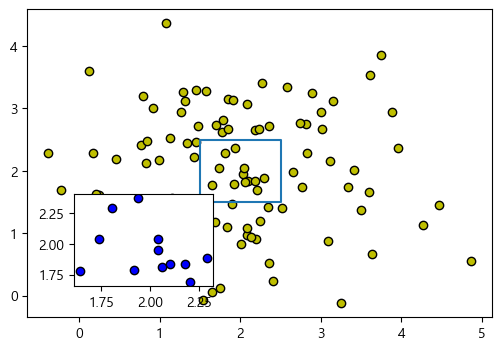

In [12]:
fig=plt.figure(figsize=(6,4), dpi=100)

## ax1 sinc plotting
ax1=fig.subplots()
d=np.random.normal(2,1,size=(100,2))
x=d[:,0]
y=d[:,1]
ax1.scatter(x,y, edgecolor='k', color='y')

# ## ax1 box plotting
ax1.plot([1.5,1.5,2.5,2.5,1.5], [1.5,2.5,2.5,1.5,1.5])

# ## sub_ax sinc plotting
ins_ax=ax1.inset_axes([0.1,0.1, 0.3,0.3])
ds=d[(1.5<x)&(x<2.5)&(1.5<y)&(y<2.5)]
xs=ds[:,0]
ys=ds[:,1]
ins_ax.scatter(xs, ys, edgecolor='k', color='b')

### 실습4

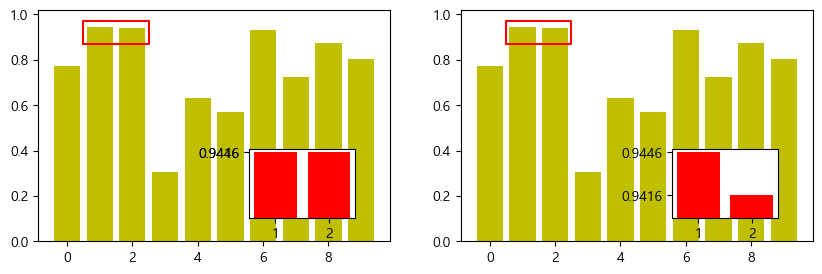

In [18]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1, ax2=fig.subplots(1,2)

y=np.array([0.7715, 0.9446, 0.9416, 0.3041, 0.6338, 0.5686, 0.9298, 0.7257, 0.8739, 0.8057])
x=range(10)

plot_X=[0.5,0.5,2.5,2.5,0.5]
plot_Y=[0.87,0.97,0.97,0.87,0.87]

# ax1
_=ax1.bar(x,y,color='y')
_=ax1.plot(plot_X,plot_Y,'r')

y1=y[1:3]
ins_ax1=ax1.inset_axes([0.6,0.1, 0.3,0.3])
_=ins_ax1.bar([1,2], y1,color='r')

_=ins_ax1.set_yticks(y1)

# ax2
_=ax2.bar(x,y,color='y')
_=ax2.plot(plot_X,plot_Y,'r')

## 코드작성
y1=y[1:3]
y2=y1-0.94
ins_ax2=ax2.inset_axes([0.6,0.1, 0.3,0.3])
_=ins_ax2.bar([1,2], y2,color='r')

_=ins_ax2.set_yticks(y2, labels=y1)
## 코드작성 끝